In [28]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generate random input data to train on

In [29]:
observations = 1000
xs = np.random.uniform(low=-10, high=10, size=(observations,1))
zs = np.random.uniform(-10, 10, size=(observations,1))

inputs = np.column_stack((xs,zs))
zs.reshape(observations,1)
xs.reshape(observations,1)

array([[-6.78974063],
       [-9.46168604],
       [ 0.24954399],
       [-6.08509496],
       [ 5.11966804],
       [ 3.19375714],
       [ 5.83265032],
       [ 8.04290073],
       [ 5.47753247],
       [-5.17885643],
       [ 3.11626391],
       [-7.00170977],
       [ 4.90530897],
       [-3.52239594],
       [ 4.51992023],
       [ 7.20035552],
       [-7.5153943 ],
       [-2.60395566],
       [-7.94064943],
       [-6.19735647],
       [ 3.52570192],
       [-3.60521505],
       [ 3.97077501],
       [-7.09516469],
       [ 7.73151416],
       [ 2.07215302],
       [-1.66996603],
       [ 1.05190759],
       [-2.81804958],
       [-7.75441198],
       [-9.56379864],
       [ 7.99810114],
       [-6.41951986],
       [ 1.22590597],
       [-4.25388536],
       [-4.67288814],
       [-2.49319796],
       [ 0.88968738],
       [ 0.62162313],
       [ 1.99974072],
       [ 6.5197137 ],
       [-2.78552922],
       [-0.61955515],
       [ 2.42378757],
       [-4.24124898],
       [ 7

# Create the targets we will aim at

In [30]:
noise = np.random.uniform(-1,1,(observations,1))

targets = 2*xs - 3*zs + 5 + noise

targets.shape

(1000, 1)

# Plot the training data

(1000,)


ValueError: operands could not be broadcast together with remapped shapes [original->remapped]: (1000,) and requested shape (1000,1)

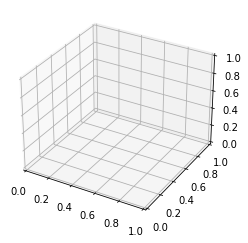

In [31]:
# In order to use the 3D plot, the objects should have a certain shape, so we reshape the targets.
# The proper method to use is reshape and takes as arguments the dimensions in which we want to fit the object.
targets = targets.reshape(observations,)
print(targets.shape)
# Plotting according to the conventional matplotlib.pyplot syntax

# Declare the figure
fig = plt.figure()

# A method allowing us to create the 3D plot
ax = fig.add_subplot(111, projection='3d')

# Choose the axes.
ax.plot(xs, zs, targets)

# Set labels
ax.set_xlabel('xs')
ax.set_ylabel('zs')
ax.set_zlabel('Targets')

# You can fiddle with the azim parameter to plot the data from different angles. Just change the value of azim=100
# to azim = 0 ; azim = 200, or whatever. Check and see what happens.
ax.view_init(azim=100)

# So far we were just describing the plot. This method actually shows the plot. 
plt.show()

# We reshape the targets back to the shape that they were in before plotting.
# This reshaping is a side-effect of the 3D plot. Sorry for that.
targets = targets.reshape(observations,1)

# Initializa variables

In [32]:
init_range = 0.1

weights = np.random.uniform(-init_range,init_range,size=(2,1))

biases = np.random.uniform(-init_range, init_range, size=1)

print(weights, biases)



[[0.03478287]
 [0.02186013]] [0.08735761]


# Set the learning rate

In [33]:
learning_rate = 0.02

# Train the model

In [34]:
targets = targets.reshape(1000,1)
for i in range(100):
    outputs = np.dot(inputs,weights) + biases
    deltas = outputs-targets
    loss = np.sum(deltas**2)/2/observations
    
    print(loss)
    
    deltas_scaled = deltas / observations
    
    weights = weights - learning_rate*np.dot(inputs.T,deltas_scaled)
    biases = biases - learning_rate*np.sum(deltas_scaled)


221.21093751195488
38.66615854715086
14.824398993871041
11.376162952683986
10.563316874323142
10.10388442136396
9.703956961755921
9.325179227138047
8.962081913771286
8.613447983202912
8.278628041500314
7.957065293614678
7.648233604463461
7.351628779197535
7.066766727454432
6.793182542760634
6.530429726959563
6.27807945934254
6.035719896520331
5.802955500245951
5.5794063918794485
5.364707732413713
5.158509127045927
4.960474053322492
4.7702793119240505
4.5876144991942605
4.412181500551523
4.243694003956818
4.081877032643673
3.9264664963476434
3.777208760302881
3.6338602313024246
3.496186960146607
3.3639642598307673
3.2369763388491744
3.115015949016662
2.9978840472332284
2.8853894706395904
2.777348624633517
2.6735851832378184
2.5739298013309306
2.478219838270479
2.386299092458758
2.298017546416928
2.2132311219518868
2.1318014450162353
2.053595619877582
1.9784860122286314
1.9063500408840732
1.8370699777243313
1.7705327555596497
1.7066297836009767
1.6452567702364578
1.5863135528243268
1.529